<a href="https://colab.research.google.com/github/Boskabadi/Boskabadi/blob/main/QLR_ID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Quantum Linear Regressionr for Industrial Deataset

Developer:  Shawgi shawgi@kt.dtu.dk
            morebo morebo@kt.dtu.dk

Date: 14/05/2024

#Import Dataset

In [ ]:
from google.colab import files

# Upload files
uploaded = files.upload()

Saving OWPTB.xlsx to OWPTB (2).xlsx


# Read Dataset

In [ ]:
import pandas as pd

OWPTB = pd.read_excel('OWPTB.xlsx',  parse_dates=True)

# Install Pennylane

In [ ]:
pip install pennylane --upgrade

In [ ]:
pip install pennylane-qiskit

# Recall Necessary Packages

In [ ]:
import pennylane as qml
from pennylane import *
from pennylane import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as npy

#Define X & Y

In [ ]:
num_rows = OWPTB.shape[0]
print("Number of rows in the dataset:", num_rows)


Number of rows in the dataset: 96238


In [ ]:
global X
X = npy.asanyarray(OWPTB["Level"].to_numpy(), dtype=float)  # Extracting the second row
global y_data
y_data = npy.asanyarray(OWPTB["Brix sensors"].to_numpy(), dtype=float)  # Extracting the third row



In [ ]:
print(X.shape, y_data.shape)
# X, y_data = X.to_numpy(), y_data.to_numpy()
print(type(X), type(y_data))


(96238,) (96238,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [ ]:
type(X[1000])

numpy.float64

In [ ]:
print(X.max(), X.min(), y_data.max(), y_data.min())
X = (X-X.min())/(X.max()-X.min())
y_data = (y_data-y_data.min())/(y_data.max()-y_data.min())

47.3400268554688 0.309433251619339 95.0140991210938 70.0300521850586


# Define the function

In [ ]:
def y_pred(weights):
    return weights[0] * X + weights[1]

In [ ]:
def cost(weights):
    y_pred_ = y_pred(weights)
    mse = np.mean((y_data - y_pred_) ** 2)
    return mse

# Optimize the Weights

In [ ]:
opt = qml.GradientDescentOptimizer(0.001)
init_weights = np.array([0.0, 0.0], requires_grad=True)
weights = init_weights
for step in range(10000):
    print(step)
    print('-'*20)
    weights = opt.step(cost, weights)
    print(cost(weights))

Streaming output truncated to the last 5000 lines.
--------------------
0.012764846194191281
8334
--------------------
0.012764114107230624
8335
--------------------
0.012763382084869938
8336
--------------------
0.012762650127103523
8337
--------------------
0.012761918233925676
8338
--------------------
0.012761186405330702
8339
--------------------
0.012760454641312898
8340
--------------------
0.01275972294186657
8341
--------------------
0.01275899130698602
8342
--------------------
0.012758259736665545
8343
--------------------
0.012757528230899458
8344
--------------------
0.012756796789682053
8345
--------------------
0.01275606541300764
8346
--------------------
0.012755334100870522
8347
--------------------
0.012754602853265
8348
--------------------
0.012753871670185386
8349
--------------------
0.012753140551625984
8350
--------------------
0.012752409497581102
8351
--------------------
0.012751678508045044
8352
--------------------
0.01275094758301212
8353
----------------

# Plot the Result

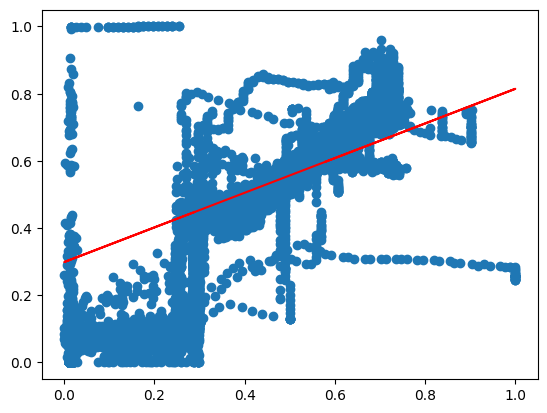

In [ ]:
plt.scatter(X, y_data)
plt.plot(X, y_pred(weights), 'r')
plt.show()